HOUSE PRICE PREDICTION

In [881]:
import pandas as pd
import numpy as np
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import *
from sklearn.preprocessing import *
from sklearn.impute import SimpleImputer

In [882]:
dataset=pd.read_csv('data.csv')
dataset.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [883]:
print(dataset.shape)

(4600, 18)


EXPLORATORY DATA ANALYTICS

In [884]:
dataset.describe

<bound method NDFrame.describe of                      date         price  bedrooms  bathrooms  sqft_living  \
0     2014-05-02 00:00:00  3.130000e+05       3.0       1.50         1340   
1     2014-05-02 00:00:00  2.384000e+06       5.0       2.50         3650   
2     2014-05-02 00:00:00  3.420000e+05       3.0       2.00         1930   
3     2014-05-02 00:00:00  4.200000e+05       3.0       2.25         2000   
4     2014-05-02 00:00:00  5.500000e+05       4.0       2.50         1940   
...                   ...           ...       ...        ...          ...   
4595  2014-07-09 00:00:00  3.081667e+05       3.0       1.75         1510   
4596  2014-07-09 00:00:00  5.343333e+05       3.0       2.50         1460   
4597  2014-07-09 00:00:00  4.169042e+05       3.0       2.50         3010   
4598  2014-07-10 00:00:00  2.034000e+05       4.0       2.00         2090   
4599  2014-07-10 00:00:00  2.206000e+05       3.0       2.50         1490   

      sqft_lot  floors  waterfront  view 

In [885]:
dataset['price'].describe

<bound method NDFrame.describe of 0       3.130000e+05
1       2.384000e+06
2       3.420000e+05
3       4.200000e+05
4       5.500000e+05
            ...     
4595    3.081667e+05
4596    5.343333e+05
4597    4.169042e+05
4598    2.034000e+05
4599    2.206000e+05
Name: price, Length: 4600, dtype: float64>

Data Preprocessing and Model Building


In [886]:
unnecc=dataset[['street','statezip','date','city','country','view','waterfront','condition']]
dataset=dataset.drop(columns=unnecc)
dataset.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated
0,313000.0,3.0,1.50,1340,7912,1.5,1340,0,1955,2005
1,2384000.0,5.0,2.50,3650,9050,2.0,3370,280,1921,0
2,342000.0,3.0,2.00,1930,11947,1.0,1930,0,1966,0
3,420000.0,3.0,2.25,2000,8030,1.0,1000,1000,1963,0
4,550000.0,4.0,2.50,1940,10500,1.0,1140,800,1976,1992


In [887]:
dataset.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
dtype: int64

In [888]:
dataset.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated
0,313000.0,3.0,1.50,1340,7912,1.5,1340,0,1955,2005
1,2384000.0,5.0,2.50,3650,9050,2.0,3370,280,1921,0
2,342000.0,3.0,2.00,1930,11947,1.0,1930,0,1966,0
3,420000.0,3.0,2.25,2000,8030,1.0,1000,1000,1963,0
4,550000.0,4.0,2.50,1940,10500,1.0,1140,800,1976,1992


In [889]:
dataset.drop_duplicates()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated
0,3.130000e+05,3.0,1.50,1340,7912,1.5,1340,0,1955,2005
1,2.384000e+06,5.0,2.50,3650,9050,2.0,3370,280,1921,0
2,3.420000e+05,3.0,2.00,1930,11947,1.0,1930,0,1966,0
3,4.200000e+05,3.0,2.25,2000,8030,1.0,1000,1000,1963,0
4,5.500000e+05,4.0,2.50,1940,10500,1.0,1140,800,1976,1992
...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3.0,1.75,1510,6360,1.0,1510,0,1954,1979
4596,5.343333e+05,3.0,2.50,1460,7573,2.0,1460,0,1983,2009
4597,4.169042e+05,3.0,2.50,3010,7014,2.0,3010,0,2009,0
4598,2.034000e+05,4.0,2.00,2090,6630,1.0,1070,1020,1974,0


In [890]:
dataset.index.is_unique

True

In [891]:
dataset['price'].skew()

24.790932561757053

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4308\1730196261.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['price'])


<Axes: xlabel='price', ylabel='Density'>

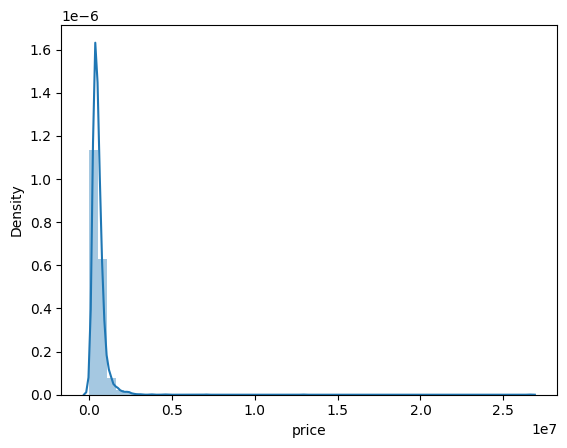

In [892]:
sns.distplot(dataset['price'])

In [893]:
dataset['price']=np.log(dataset['price'])
dataset['price'].skew()

c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\nanops.py:1248: RuntimeWarning: invalid value encountered in subtract
  adjusted = values - mean


nan

In [894]:
dataset['sqft_above']=np.log(dataset['sqft_above'])
dataset['sqft_basement']=np.log(dataset['sqft_basement'])
dataset['sqft_living']=np.log(dataset['sqft_living'])
dataset['sqft_lot']=np.log(dataset['sqft_lot'])
dataset['yr_built']=np.log(dataset['yr_built'])
dataset['yr_renovated']=np.log(dataset['yr_renovated'])

In [895]:
dataset.dropna(inplace=True)

In [896]:
X=dataset.drop(columns='price',axis=1)
Y=dataset[['price']]

In [897]:
X = X.replace((np.inf,-np.inf,np.nan),0).reset_index(drop=True)
Y = Y.replace((np.inf,-np.inf,np.nan),0).reset_index(drop=True)

In [898]:
sc=StandardScaler()
X_scaled = sc.fit_transform(X)
y_Scaled = sc.fit_transform(Y)

In [899]:
mx=MinMaxScaler()
x_new=mx.fit_transform(X_scaled)
y_new=mx.fit_transform(y_Scaled)

In [900]:
xtrain,xtest,ytrain,ytest=train_test_split(X_scaled,y_Scaled,test_size=0.3,random_state=0)
print(xtrain.shape)
print(xtest.shape)

(3220, 9)
(1380, 9)


In [901]:
model=LinearRegression()
model.fit(xtrain,ytrain)
print(model)

prediction = model.predict(xtest)
print("Predicted output :",prediction)
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

r2 =  r2_score(ytest, prediction)
mae = mean_absolute_error(ytest, prediction)
mse = mean_squared_error(ytest, prediction)
rmse = mean_squared_error(ytest, prediction, squared=False)






LinearRegression()
Predicted output : [[ 0.03690917]
 [ 0.09534407]
 [-0.49626179]
 ...
 [ 0.33799849]
 [ 0.07388379]
 [ 0.03222834]]
Intercept: [0.00138985]
Coefficients: [[-0.07358775 -0.04550537  0.006432   -0.03963083  0.05943767  0.25718118
   0.14773419 -0.07398601 -0.00598819]]


In [902]:
print(f"R-squared (R²) score: {r2:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

R-squared (R²) score: 0.06
Mean Absolute Error (MAE): 0.33
Mean Squared Error (MSE): 1.01
Root Mean Squared Error (RMSE): 1.00
